In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)

In [3]:
filepath = "nsw_road_crash_data_2018-2022_crash.csv"
if os.path.isfile(filepath):
    print("loading from file")
else:
    share_link = "https://drive.google.com/file/d/1O0uZgDLg6vooluUgi_7m6Us_VdxkV5Pt/view?usp=sharing"
    file_id = share_link.split('/d/')[1].split('/')[0]
    filepath = f"https://drive.google.com/uc?export=download&id={file_id}"
    print("reading from google drive")

crash_data = pd.read_csv(filepath)
print("done")

loading from file
done


In [4]:
crash_data.head(4)

,Crash ID,Degree of crash,Degree of crash - detailed,Reporting year,Year of crash,Month of crash,Day of week of crash,Two-hour intervals,Street of crash,Street type,...,DCA - description,DCA supplement,First impact type,Key TU type,Other TU type,No. of traffic units involved,No. killed,No. seriously injured,No. moderately injured,No. minor-other injured
0,1151002,Non-casualty (towaway),Non-casualty (towaway),2018,2018,February,Thursday,06:00 - 07:59,SACKVILLE,ST,...,Manov - Reverse in traffic,NaN,Other angle,Car (sedan/hatch),Car (sedan/hatch),3,0,0,0,0
1,1158000,Fatal,Fatal,2018,2018,January,Monday,00:01 - 01:59,BRUNKER,RD,...,On path - Parked,NaN,Other angle,Car (sedan/hatch),Light truck utility(from 2018),2,1,2,0,0
2,1158001,Fatal,Fatal,2018,2018,January,Monday,08:00 - 09:59,CLARENCE,WAY,...,Off left bend into obj,Right,Vehicle - Object,Car (sedan/hatch),NaN,1,1,0,0,0
3,1158002,Fatal,Fatal,2018,2018,January,Monday,02:00 - 03:59,RAILWAY,RD,...,Ped - On carriageway,NaN,Vehicle - Pedestrian,Car (sedan/hatch),Pedestrian,2,1,0,0,0


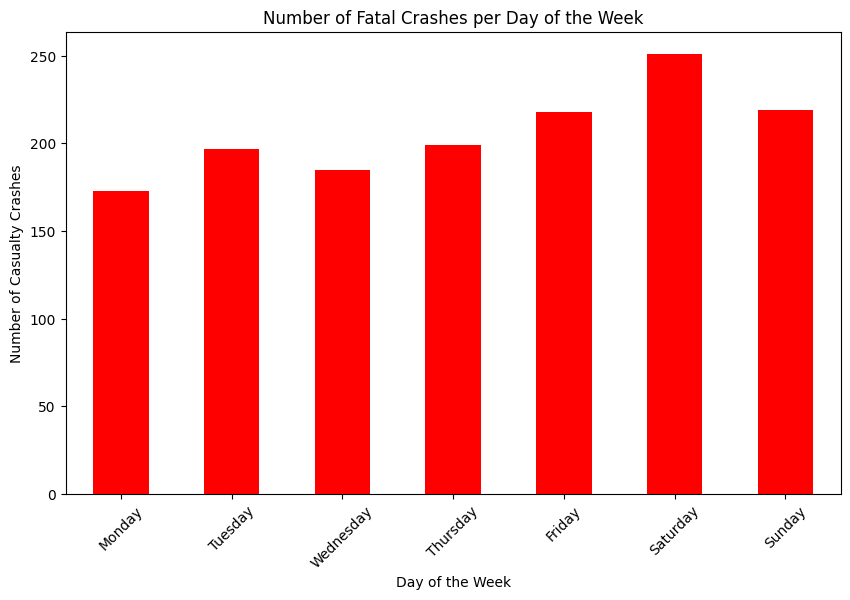

In [5]:
casualty_crashes = crash_data[crash_data['Degree of crash'] == 'Fatal']
casualty_counts_per_day_in_week = casualty_crashes['Day of week of crash'].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.figure(figsize=(10, 6))
casualty_counts_per_day_in_week.plot(kind='bar', color='red')
plt.title('Number of Fatal Crashes per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Casualty Crashes')
plt.xticks(rotation=45)
plt.show()

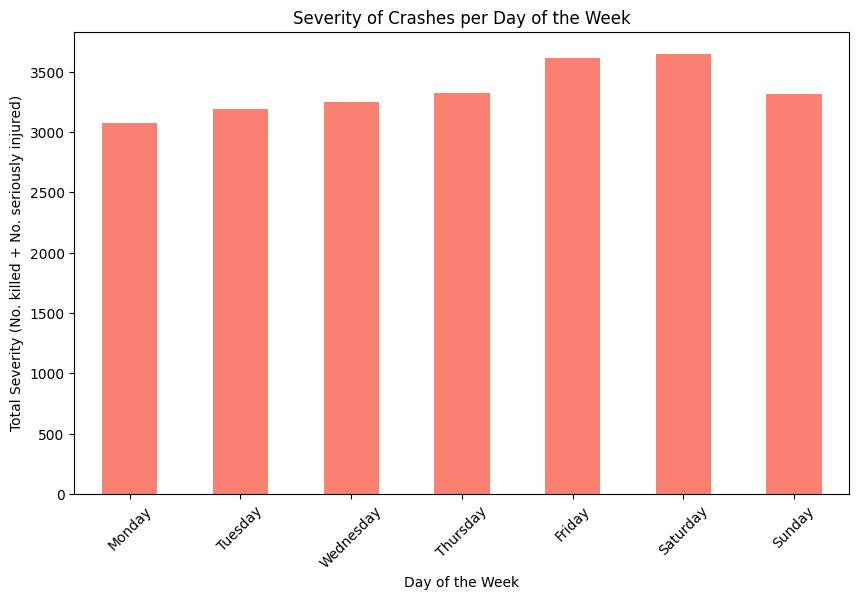

Done the graph of severity


In [6]:
crash_data['Severity'] = crash_data['No. killed'] + crash_data['No. seriously injured']
severity_per_day = crash_data.groupby('Day of week of crash')['Severity'].sum().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
plt.figure(figsize=(10, 6))
severity_per_day.plot(kind='bar', color='salmon')
plt.title('Severity of Crashes per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Severity (No. killed + No. seriously injured)')
plt.xticks(rotation=45)
plt.show()

print("Done the graph of severity")

We now make some analysis to the time frame of the crash on the days with less crash, and the days with more crash.

In [7]:
def categorize_time(interval):
    time_map = {
        "Midnight": ["22:00 - 23:59", "00:00 - 01:59", "02:00 - 03:59"],
        "Morning": ["04:00 - 05:59", "06:00 - 07:59", "08:00 - 09:59"],
        "Noon": ["10:00 - 11:59", "12:00 - 13:59"],
        "Evening": ["14:00 - 15:59", "16:00 - 17:59", "18:00 - 19:59", "20:00 - 21:59"]
    }
    
    for timeName in time_map:
        if interval in time_map[timeName]:
            return timeName
    return "Unknown"

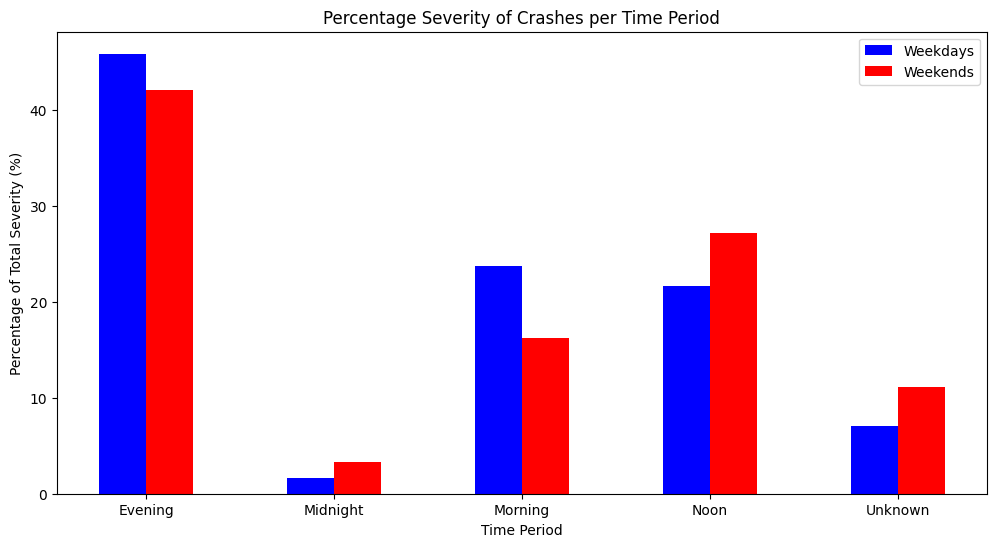

Done


In [8]:
crash_data['Time Period'] = crash_data['Two-hour intervals'].apply(categorize_time)

weekdays = crash_data[crash_data['Day of week of crash'].apply(lambda x: x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekends = crash_data[crash_data['Day of week of crash'].apply(lambda x: x in ['Saturday', 'Sunday'])]

severity_weekdays = weekdays.groupby('Time Period')['Severity'].sum()
severity_weekends = weekends.groupby('Time Period')['Severity'].sum()

total_weekdays = severity_weekdays.sum()
total_weekends = severity_weekends.sum()

combined_severity = pd.concat([severity_weekdays, severity_weekends], axis=1, keys=['Weekdays', 'Weekends'])

# Plotting grouped bar graph
plt.figure(figsize=(12, 6))
bar_width = 0.25
index = range(len(combined_severity))

weekday_percentage = combined_severity['Weekdays'] / total_weekdays * 100.0
plt.bar(index, weekday_percentage, bar_width, color='blue', label='Weekdays')

# Plot weekends severity
weekend_percentage = combined_severity['Weekends'] / total_weekends * 100.0
plt.bar([i + bar_width for i in index], weekend_percentage, bar_width, color='red', label='Weekends')

plt.xlabel('Time Period')
plt.ylabel('Percentage of Total Severity (%)')
plt.title('Percentage Severity of Crashes per Time Period')
plt.xticks([i + bar_width / 2 for i in index], combined_severity.index)
plt.legend()
# plt.tight_layout()
plt.show()

print("Done")

We observe higher percentages of fatal crashes occurring during the morning and evening on weekdays, which aligns with typical commuting times. Conversely, more fatal crashes happened during the noon and midnight on weekends. These findings are quite logical. Weekdays see increased traffic during morning and evening rush hours due to work and school commutes, naturally increasing the likelihood of accidents during these times. Conversely, weekends witness higher rates of alcohol consumption and leisure activities throughout the whole day, leading to high transportation activity during the noon and late hours. During the noon, people are actively engaged in social activities, while in the midnight, they are either still out or heading home after social gatherings.